In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [3]:
df_data = pd.read_csv('insurance.csv')
df_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## Visualizing Data

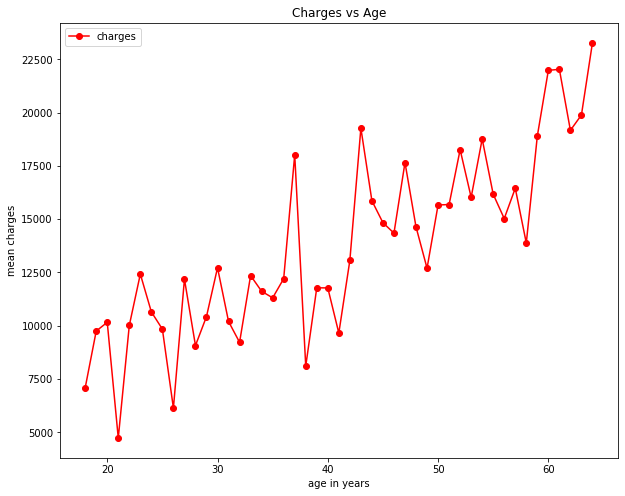

In [183]:
df = df_data.groupby('age').mean()
plt.figure(figsize=(10,8))
graph_age_charges = plt.plot(df.index,df['charges'],color='red',marker='o')
plt.title("Charges vs Age")
plt.xlabel("age in years")
plt.ylabel("mean charges")
plt.legend(['charges'])
plt.show()

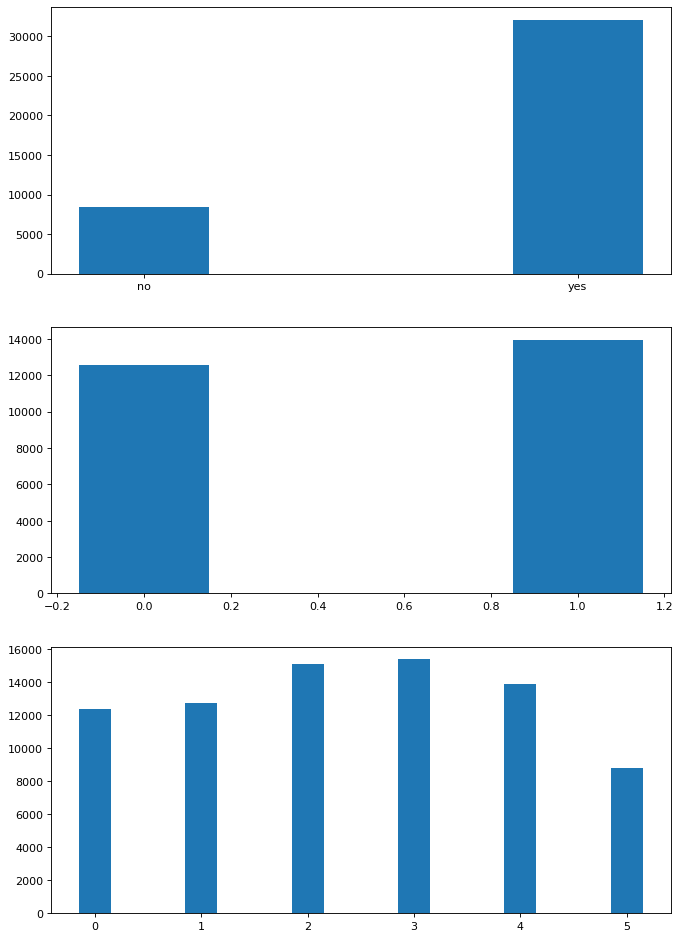

In [48]:
plt.figure(figsize=(10,15),dpi=80)
plt.subplot(3,1,1)
df1 = df_data.groupby('smoker').mean()
hist_smoking = plt.bar(df1.index,df1['charges'],width = 0.3)
plt.subplot(3,1,2)
df2 = df_data.groupby('sex').mean()
bar_gender = plt.bar(df2.index,df2['charges'],width=0.3)
plt.subplot(3,1,3)
df4 = df_data.groupby('children').mean()
bar_children = plt.bar(df4.index,df4['charges'],width=0.3)
plt.show()

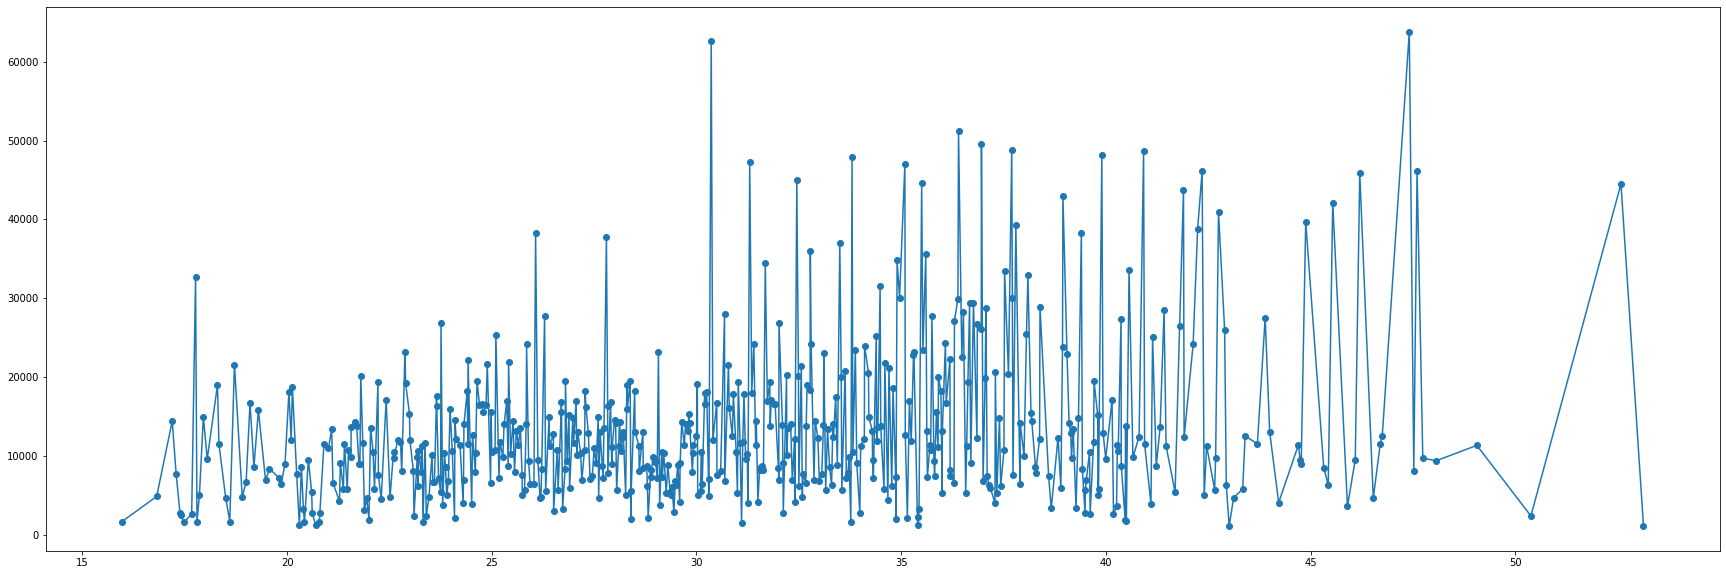

In [190]:
plt.figure(figsize=(30,10))
df3 = df_data.groupby('bmi').mean()
plot_bmi = plt.plot(df3.index,df3['charges'],marker="o")
plt.show()


### Model Training

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df_data['sex'] = df_data['sex'].replace(['female'],0)
df_data['sex'] = df_data['sex'].replace(['male'],1)
df_data['smoker'] = df_data['smoker'].replace(['yes'],1)
df_data['smoker'] = df_data['smoker'].replace(['no'],0)
le = LabelEncoder().fit(df_data['region'])
df_data['region']=le.transform(df_data['region'])
df_data

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [57]:
y = df_data['charges']
X = df_data.drop(['charges'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression().fit(X_train,y_train)
predictions = model.predict(X_test)


##### Checking R2 Score

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
score

0.7962732059725786

### Polynommial Regression

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [152]:
X_train_ = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test_ = PolynomialFeatures(degree=2).fit_transform(X_test)


In [153]:
model = LinearRegression().fit(X_train_,y_train)


In [154]:
predictions = model.predict(X_test_)

##### Checking R2 Score

In [155]:
score = r2_score(y_test,predictions)
score

0.8846283666147688

### Ridge Regression

In [156]:
from sklearn.linear_model import Ridge

In [157]:
model_ridge = Ridge(alpha=0.01).fit(X_train_,y_train)

In [158]:
predictions = model_ridge.predict(X_test_)
score = r2_score(y_test,predictions)
score

0.8846242574378527

### Lasso Regression

In [159]:
from sklearn.linear_model import Lasso

In [171]:
model_lasso = Lasso(alpha=1).fit(X_train_,y_train)

C:\Users\omkar gokhale\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12047578617.365465, tolerance: 14332173.513203096
  positive)


In [172]:
predictions = model_lasso.predict(X_test_)
score = r2_score(y_test,predictions)
score

0.8846855513427054

##### Since Lasso has produced the best r2 score, we use the lasso regression model